# Skip-gram Model Implementation

## Prepare the Data

In [172]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Corpus
def read_sentences_from_file(file_path):
    corpus = []
    with open(file_path, 'r') as file:
        for line in file:
            # Assuming each line contains one sentence
            sentence = line.strip()
            if sentence:  # Check if the line is not empty
                corpus.append(sentence)
    return corpus

corpus = read_sentences_from_file("corpus.txt")

In [173]:
# Tokenize and create vocabulary
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1

##  Input-Output Pairs

In [174]:
context_window = 2

def generate_skipgram_data(corpus, context_window, tokenizer):
    sequences = tokenizer.texts_to_sequences(corpus)
    data = []
    for sequence in sequences:
        for i, target_word_index in enumerate(sequence):
            for j in range(i - context_window, i + context_window + 1):
                if j != i and 0 <= j < len(sequence):
                    context_word_index = sequence[j]
                    data.append([target_word_index, context_word_index])
    return np.array(data)

skipgram_data = generate_skipgram_data(corpus, context_window, tokenizer)
X, y = skipgram_data[:, 0], skipgram_data[:, 1]

In [175]:
skipgram_data.shape

(736, 2)

## Create CBOW Model Architecture

In [176]:
# Model
embedding_dim = 100

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=1),
    tf.keras.layers.Reshape((embedding_dim,)),
    tf.keras.layers.Dense(vocab_size, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')

In [177]:
epochs = 50
batch_size = 16

model.fit(X, y, epochs=epochs, batch_size=batch_size)

Epoch 1/50
46/46 [==============================] - 1s 3ms/step - loss: 4.0364
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 3.9495
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 3.8418
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 3.6977
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 3.5158
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 3.3229
Epoch 7/50
46/46 [==============================] - 0s 3ms/step - loss: 3.1484
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 3.0067
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 2.8962
Epoch 10/50
46/46 [==============================] - 0s 2ms/step - loss: 2.7976
Epoch 11/50
46/46 [==============================] - 0s 2ms/step - loss: 2.7051
Epoch 12/50
46/46 [==============================] - 0s 2ms/step - loss: 2.6175
Epoch 13/50
46/46 [==============================

In [178]:
# Evaluation
evaluation_result = model.evaluate(X, y, batch_size=batch_size)
print("\nEvaluation result:", evaluation_result)

46/46 [==============================] - 0s 2ms/step - loss: 2.0790

Evaluation result: 2.07895827293396


## Visualizing Word Embeddings using t-SNE:

In [179]:
# Visualize word embeddings using t-SNE
embeddings = model.layers[0].get_weights()[0]

tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings)

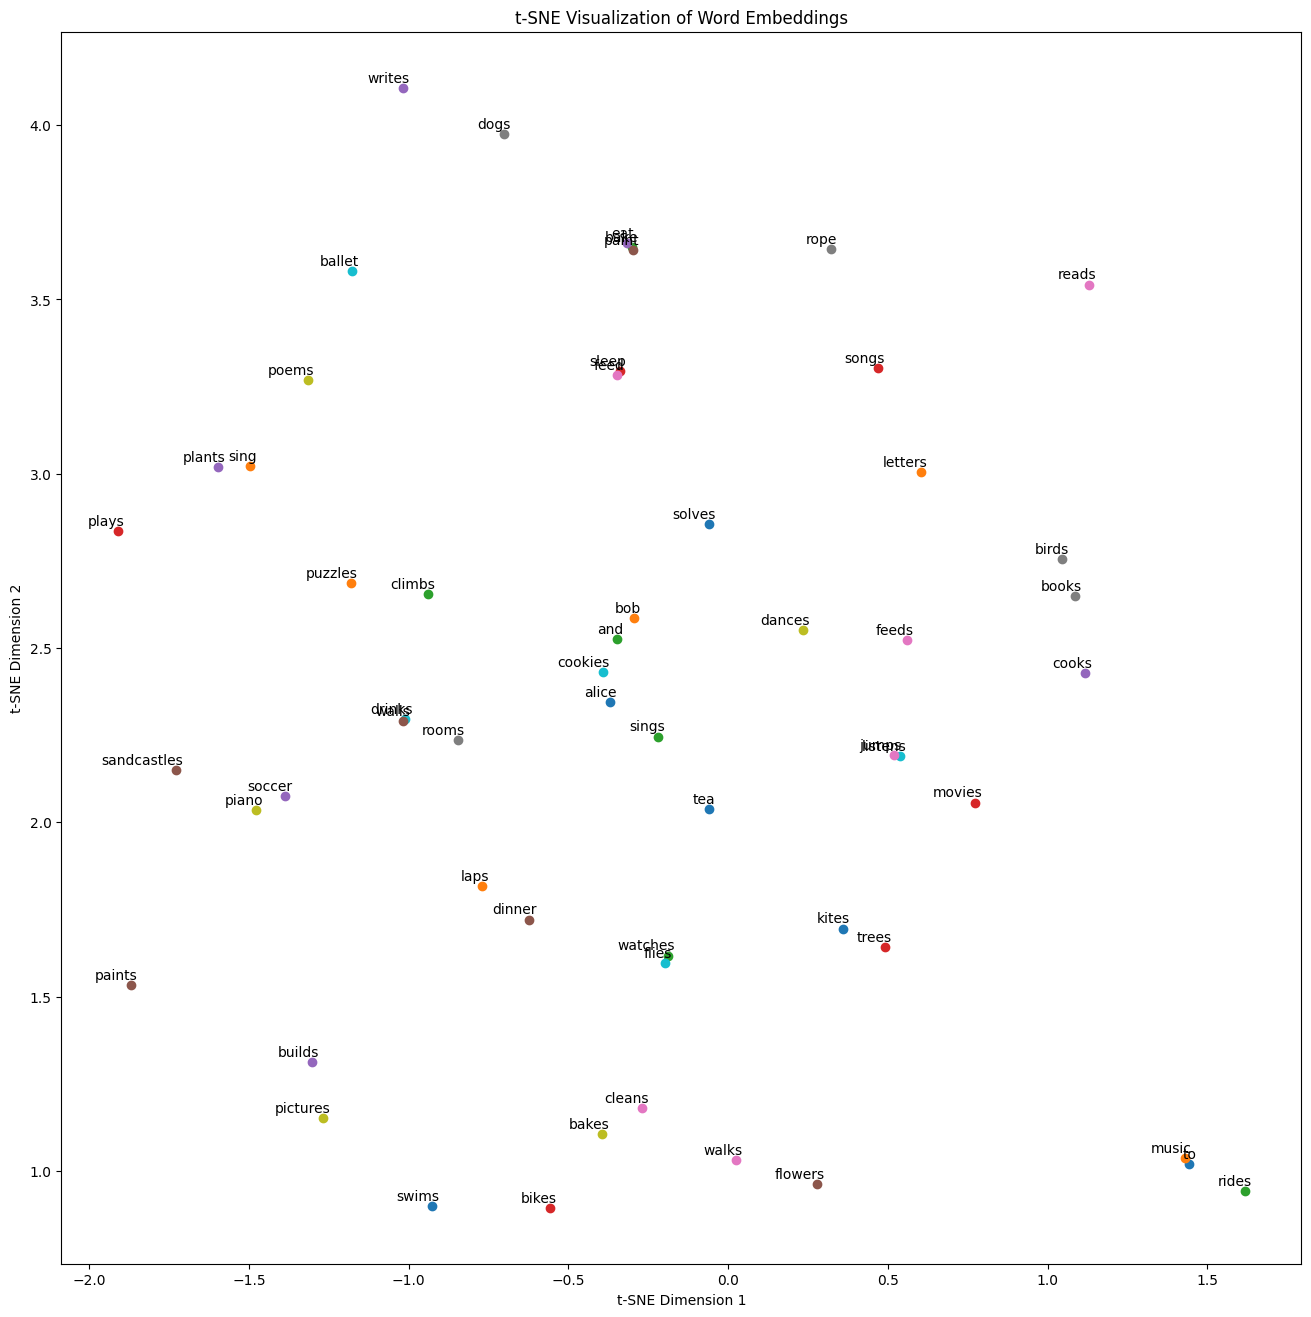

In [185]:
# Plot t-SNE visualization
plt.figure(figsize=(16, 16))
for i, word in enumerate(word_index.keys()):
    plt.scatter(embeddings_2d[i, 0], embeddings_2d[i, 1])
    plt.annotate(word, xy=(embeddings_2d[i, 0], embeddings_2d[i, 1]), xytext=(5, 2),
                 textcoords='offset points', ha='right', va='bottom')
plt.title('t-SNE Visualization of Word Embeddings')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

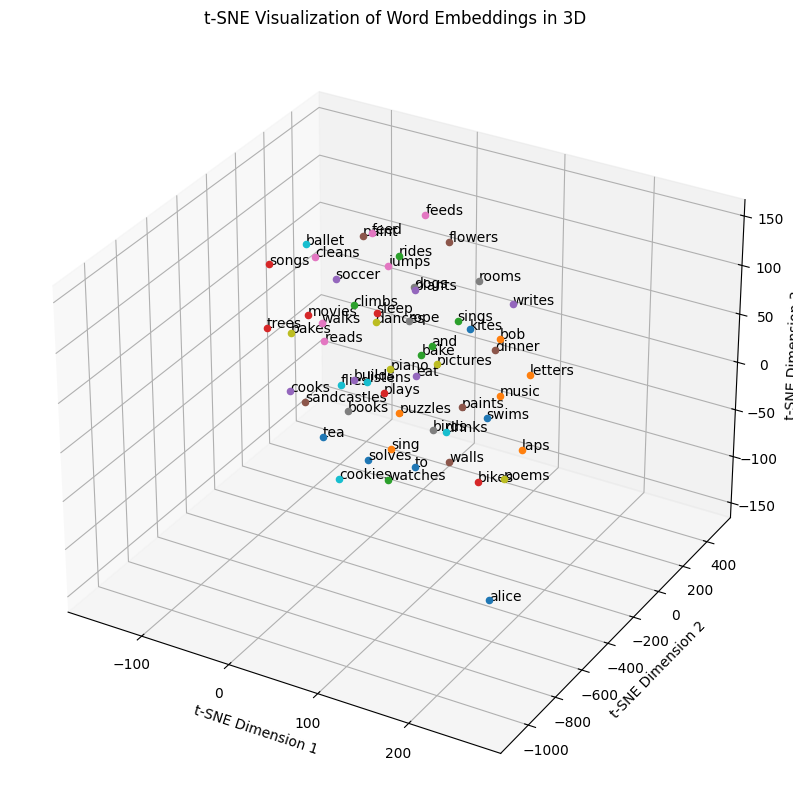

In [181]:
# Visualize word embeddings using t-SNE in 3D
tsne_3d = TSNE(n_components=3, random_state=42)
embeddings_3d = tsne_3d.fit_transform(embeddings)

# Plot t-SNE visualization in 3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
for i, word in enumerate(word_index.keys()):
    ax.scatter(embeddings_3d[i, 0], embeddings_3d[i, 1], embeddings_3d[i, 2])
    ax.text(embeddings_3d[i, 0], embeddings_3d[i, 1], embeddings_3d[i, 2], word)
ax.set_title('t-SNE Visualization of Word Embeddings in 3D')
ax.set_xlabel('t-SNE Dimension 1')
ax.set_ylabel('t-SNE Dimension 2')
ax.set_zlabel('t-SNE Dimension 3')
plt.show()

 It performs well when the task requires capturing semantic relationships between words, especially for infrequent words or specialized domains.

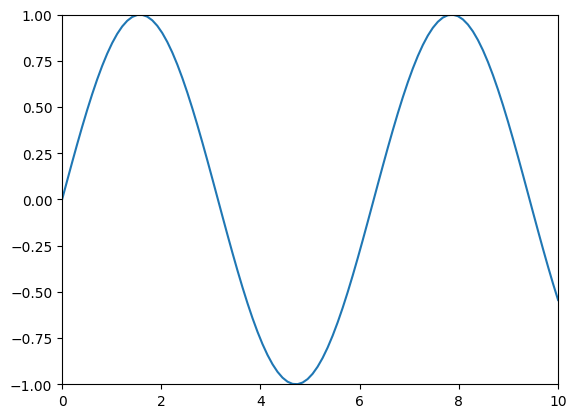